In [1]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 7]

## Load data:

For Each Attribute:
   1. Watch time(Minutes)
   2. Stream time(minutes)	
   3. Peak viewers
   4. Average viewers	
   5. Followers
   6. Followers gained	
   7. Views gained	
   8. Mature
   9. Language

In [2]:
df = pd.read_csv("./twitchdata-update.csv")
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [3]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
df.memory_usage() # in bytes

Index                    128
Channel                 8000
Watch time(Minutes)     8000
Stream time(minutes)    8000
Peak viewers            8000
Average viewers         8000
Followers               8000
Followers gained        8000
Views gained            8000
Partnered               1000
Mature                  1000
Language                8000
dtype: int64

In [6]:
df.memory_usage().sum()

74128

In [7]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


#### Statistical moments

1. Mean (1st moment)
2. Variance (2nd moment)
3. Skewness (3rd moment)
4. Kurtosis (4th moment)

In [8]:
df.mean()

Watch time(Minutes)     4.184279e+08
Stream time(minutes)    1.205152e+05
Peak viewers            3.706505e+04
Average viewers         4.781040e+03
Followers               5.700541e+05
Followers gained        2.055185e+05
Views gained            1.166817e+07
Partnered               9.780000e-01
Mature                  2.300000e-01
dtype: float64

In [9]:
df['Watch time(Minutes)'].mean()

418427930.13

In [10]:
df['Followers'].mean()

570054.068

In [11]:
df.var()

Watch time(Minutes)     3.020992e+17
Stream time(minutes)    7.289096e+09
Peak viewers            3.637816e+09
Average viewers         7.146479e+07
Followers               6.470809e+11
Followers gained        1.155413e+11
Views gained            6.202950e+14
Partnered               2.153754e-02
Mature                  1.772773e-01
dtype: float64

#### Skewness

Skewness is the measure of the symmetry of a distribution compared to standard normal distribution

 - +ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.
 - 0 - symmetric
 - -ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [12]:
df.skew()

Watch time(Minutes)      5.165895
Stream time(minutes)     2.598804
Peak viewers             4.528788
Average viewers          9.066586
Followers                4.549879
Followers gained         5.342437
Views gained            19.085191
Partnered               -6.527236
Mature                   1.285099
dtype: float64

#### Kurtosis

Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.

 - +ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)
 - 0 - Mesokurtic (normal dist.)
 - -ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution

In [13]:
df.kurtosis()

Watch time(Minutes)      38.433088
Stream time(minutes)      9.013747
Peak viewers             27.638434
Average viewers         126.842393
Followers                29.324268
Followers gained         42.580266
Views gained            490.629166
Partnered                40.686181
Mature                   -0.349222
dtype: float64

#### min / max / median

In [14]:
df.min()

Channel                 10000DAYS
Watch time(Minutes)     122192850
Stream time(minutes)         3465
Peak viewers                  496
Average viewers               235
Followers                    3660
Followers gained           -15772
Views gained               175788
Partnered                   False
Mature                      False
Language                   Arabic
dtype: object

In [15]:
df.max()

Channel                 홍방장 (game2eye)
Watch time(Minutes)         6196161750
Stream time(minutes)            521445
Peak viewers                    639375
Average viewers                 147643
Followers                      8938903
Followers gained               3966525
Views gained                 670137548
Partnered                         True
Mature                            True
Language                       Turkish
dtype: object

In [16]:
df.median()

Watch time(Minutes)     234990787.5
Stream time(minutes)       108240.0
Peak viewers                16676.0
Average viewers              2425.0
Followers                  318063.0
Followers gained            98352.0
Views gained              6456323.5
Partnered                       1.0
Mature                          0.0
dtype: float64

#### Correlation

In [17]:
df.corr()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000


In [18]:
import seaborn as sns

<AxesSubplot:>

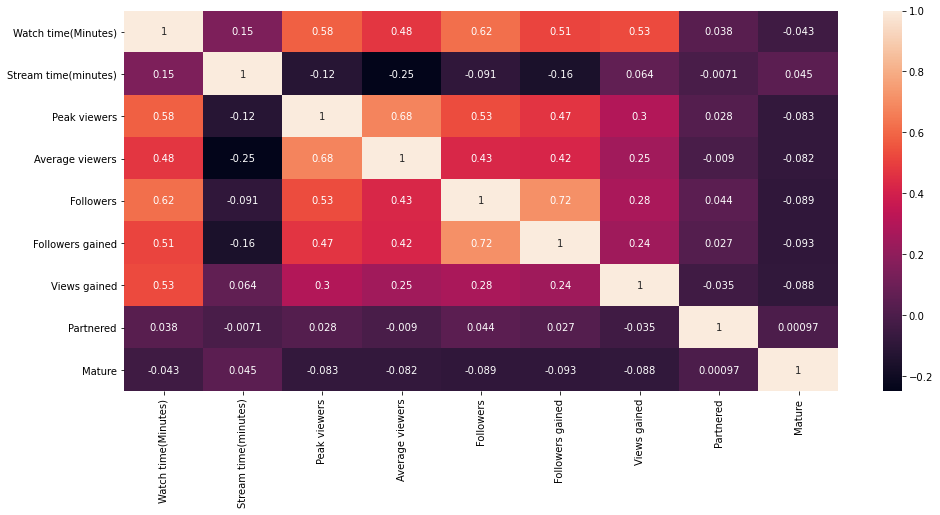

In [19]:
sns.heatmap(df.corr(), annot=True)

### Lineplot

Text(0, 0.5, 'Stream time(minutes)')

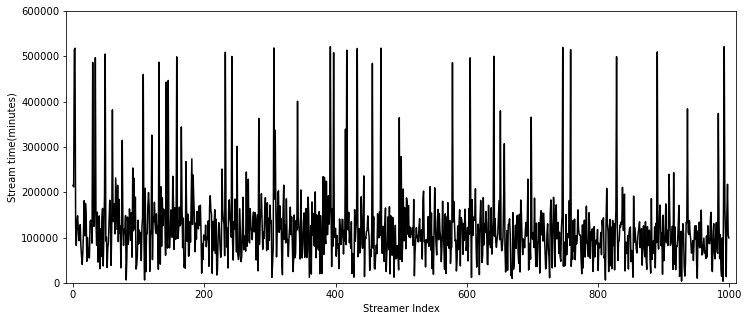

In [20]:
df['Stream time(minutes)'].plot(figsize=(12, 5), color='black')

plt.xlim(-10, 1010)
plt.ylim(0, 600000)
plt.xlabel('Streamer Index')
plt.ylabel('Stream time(minutes)')


### Scatterplot

<AxesSubplot:xlabel='Average viewers', ylabel='Watch time(Minutes)'>

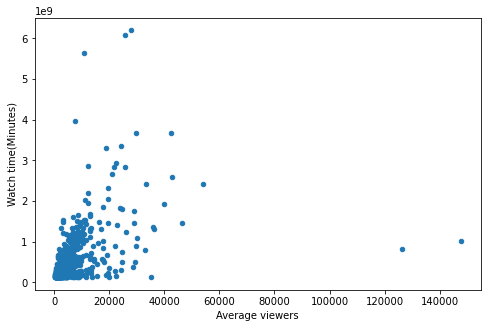

In [21]:
df.plot.scatter('Average viewers', 'Watch time(Minutes)', figsize=(8, 5))

### Boxplot

<AxesSubplot:>

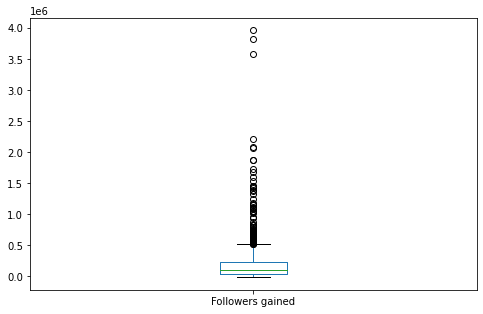

In [22]:
df['Followers gained'].plot.box(figsize=(8, 5))

<AxesSubplot:>

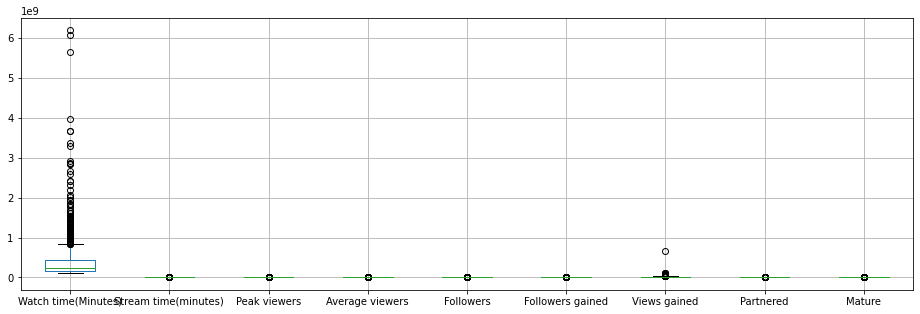

In [23]:
df.boxplot(figsize=(16, 5))
# Due to the size of data in "Watch time(Minutes)" the rest are showing up as dots

### Histogram

<AxesSubplot:>

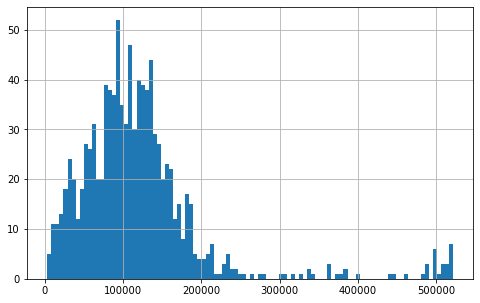

In [24]:
df['Stream time(minutes)'].hist(bins=100, figsize=(8, 5))

(0.0, 60.0)

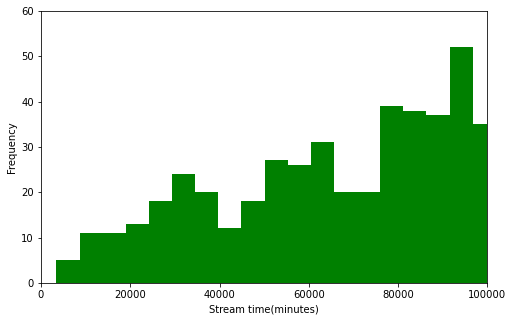

In [25]:
ax = df['Stream time(minutes)'].hist(
    bins=100, grid=False, color='green', figsize=(8, 5))

ax.set_xlabel('Stream time(minutes)')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 100000)
ax.set_ylim(0, 60)


### Barplot
The bar charts are used to visualize categorical data (nominal or ordinal values) and the height shows the value it represents

<AxesSubplot:xlabel='Followers'>

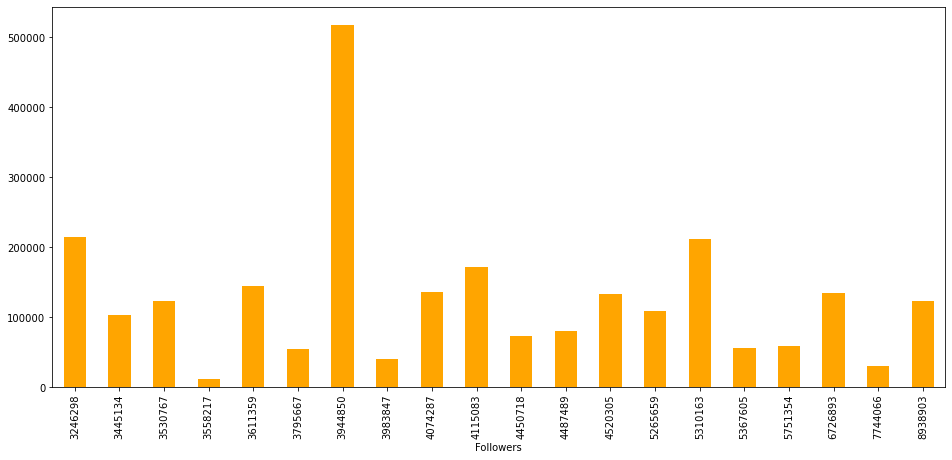

In [26]:
df_avg_stream_time = df.groupby('Followers')['Stream time(minutes)'].mean()
df_avg_stream_time[-20:].plot.bar(color='orange')

Text(0, 0.5, 'Follower Count')

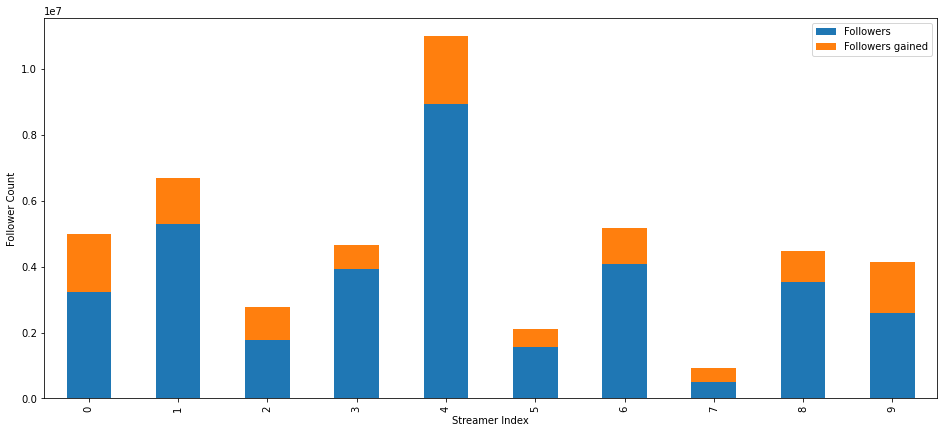

In [27]:
ax = df[['Followers', 'Followers gained']][:10].plot.bar(stacked=True)

ax.set_xlabel("Streamer Index")
ax.set_ylabel("Follower Count")

### Multiple Plots

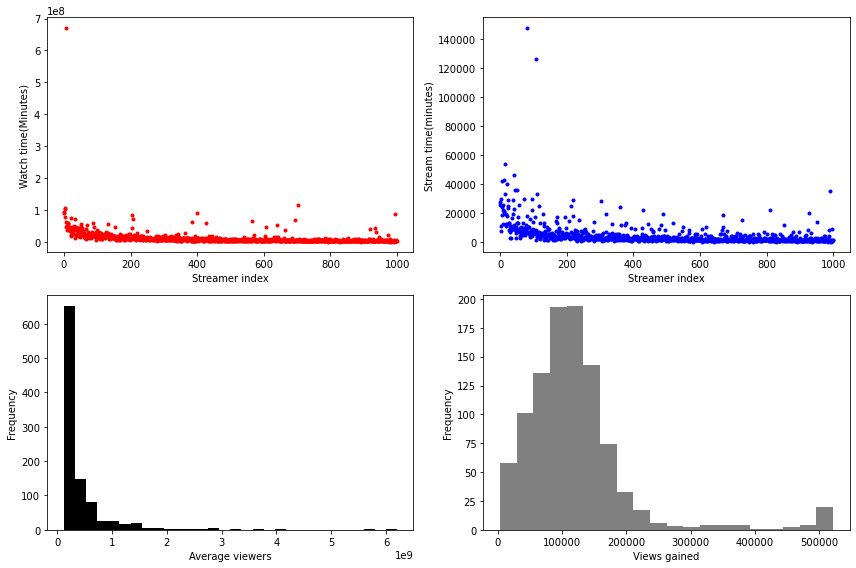

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df['Views gained'].plot(ax=axes[0][0], style='.', color='red')  # top left
df['Average viewers'].plot(ax=axes[0][1], style='.', color='blue')  # top right

df['Watch time(Minutes)'].plot.hist(
    bins=30, ax=axes[1][0], color='black')  # bottom left
df['Stream time(minutes)'].plot.hist(
    bins=20, ax=axes[1][1], color='gray')  # bottom right

axes[0][0].set_xlabel('Streamer index')
axes[0][1].set_xlabel('Streamer index')
axes[1][0].set_xlabel('Average viewers')
axes[1][1].set_xlabel('Views gained')

axes[0][0].set_ylabel('Watch time(Minutes)')
axes[0][1].set_ylabel('Stream time(minutes)')

fig.tight_layout()